In [1]:
%matplotlib inline

# Tema: Introducción a Scikit-Learn

## Clasificación de especies de lirio (Versión 2)

Veremos ahora algunas variantes del proceso de carga y clasificación del data set Iris realizado previamente. En primer lugar, cargaremos el conjunto de datos utilizando otra herramienta provista por Scikit-Learn, la función ``load_iris``

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

El objeto retornado por ``load_iris`` es un objeto ``Bunch``, que tiene muchas similitudes con un diccionario. En particular, contiene claves y valores: 

In [3]:
print("Keys of iris_dataset: {}".format(iris_dataset.keys()))

Keys of iris_dataset: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


El valor de la clave ``DESCR`` es una descripción breve del conjunto de datos. Mostramos a continuación el comienzo de esta descripción:

In [4]:
print(iris_dataset['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


El valor de la clave ``target_names`` es un arreglo de strings, que contiene las especies (tipos) de lirio que buscamos predecir:

In [5]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


El valor de ``feature_names`` es una lista de strings, con una descripción de cada feature (característica)

In [6]:
print("Feature names: {}".format(iris_dataset['feature_names']))

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Los datos propiamente dichos, están contenidos en los campos ``data`` y ``target``. ``data`` contiene las mediciones numéricas correspondientes a las 4 features (sepal length, sepal width, petal length, petal width) en un arreglo NumPy: 

In [7]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


Las filas en el arreglo ``data`` corresponden a las flores, mientras que las columnas representan las 4 mediciones que fueron tomadas por cada flor:

In [8]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


Aqui mostramos los valores de las features de las 5 primeras muestras (flores):

In [9]:
print("First five rows of data:\n{}".format(iris_dataset['data'][:5]))

First five rows of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


En estos datos, podemos ver que las 5 flores tienen un ancho de pétalo de 0.2 cms y que la primer flor tiene el sépalo mas largo (5.1 cms)

El arreglo ``target`` contiene las especies de cada una de las flores que fueron medidas, también como un arreglo NumPy:

In [10]:
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


``target`` es un arrglo uni-dimensional, con una entrada por flor:

In [11]:
print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


Las especies están codificadas como enteros de 0 a 2:

In [12]:
print("Target:\n{}".format(iris_dataset['target']))
len(iris_dataset['target'])

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


150

Los significados de los números están dados por el arreglo iris_dataset['target_names']: 0 significa setosa, 1 significa versicolor, y 2 significa virginica.

In [13]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Midiendo la efectividad de un clasificador: Datos de entrenamiento y prueba

Como podemos observar, a diferencia del DataFrame retornado por ``load_dataset`` de Seaborn, los datos contenidos en ``data`` y ``target`` están listos para ser usados en ``train_test_split`` para separarlos en un conjunto de entrenamiento y uno de test:

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [15]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [16]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


El número de muestras que resultan en el conjunto de entrenamiento (112) y en el de test (38) no es casual. Esta función "mezcla" las muestras y deja un 75% para training y un 25% para test. Ya veremos luego como modificar estos porcentajes. 

Podemos por lo tanto proceder a entrenar un modelo knn como antes:

In [17]:
from sklearn.neighbors import KNeighborsClassifier
modelKnn = KNeighborsClassifier(n_neighbors=15)
modelKnn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

Y luego evaluarlo:

In [18]:
from sklearn.metrics import accuracy_score
y_model = modelKnn.predict(X_test)
accuracy_score(y_test, y_model)

0.9736842105263158

Alternativamente, podriamos haber usado el mismo método ``score`` del modelo (objeto knn):

In [19]:
print("Test set score: {:.2f}".format(modelKnn.score(X_test, y_test)))

Test set score: 0.97


Podemos tener una mejor idea del rendimiento general de nuestro clasificador utilizando el informe de clasificación, que enumera las estadísticas de recuperación etiqueta por etiqueta:

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_model,
                            target_names=iris_dataset.target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       1.00      0.94      0.97        16
  virginica       0.90      1.00      0.95         9

avg / total       0.98      0.97      0.97        38



También podríamos mostrar la matriz de confusión entre estas clases:

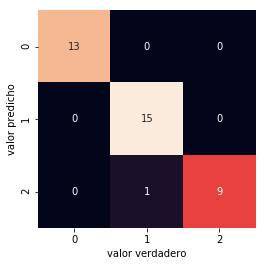

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho');

O usar en la matriz de confusión los nombres reales de las clases de lirios 

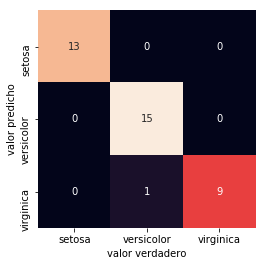

In [22]:
sns.heatmap(mat.T, square=True, annot=True, cbar=False,
            xticklabels=iris_dataset.target_names,
            yticklabels=iris_dataset.target_names)
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho');

## Usando otros clasificadores: SVM y Bayes

El ejemplo anterior, es un extracto representativo del código esencial para aplicar cualquier algoritmo de aprendizaje automático en SciKit-Learn, provisto por los métodos ``fit``, ``predict`` y ``score``. Veamos como sería ahora con otros métodos distintos de knn.

### SVM

Support Vector Machines (SVM), o *máquinas de vectores soporte*, es un método muy conocido, al que se le suelen especificar dos hiperparámetros: los valores de ``gamma`` y el ``C`` 

In [23]:
from sklearn import svm
modelSVM = svm.SVC(gamma=0.001,C=100.)
modelSVM.fit(X_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_model = modelSVM.predict(X_test)
accuracy_score(y_test, y_model)

0.9736842105263158

### Bayes Naive

Bayes Naive (ingenuo), es otro método muy popular, especificándose a continuación su variante "Gaussiana"

In [25]:
from sklearn.naive_bayes import GaussianNB
modelBayes = GaussianNB()
modelBayes.fit(X_train, y_train)

GaussianNB(priors=None)

In [26]:
y_model = modelBayes.predict(X_test)
accuracy_score(y_test, y_model)

1.0